In [1]:
import pandas as pd
import numpy as np
train_df=pd.read_csv('./Data/zhengqi_train.txt',sep='\t')
print(train_df.shape)
train_x, train_y = train_df.iloc[:, 0:38], train_df.iloc[:, [38]]

(2888, 39)


In [2]:
train_x.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028


In [3]:
train_y.head()

,target
0,0.175
1,0.676
2,0.633
3,0.206
4,0.384


In [4]:
test_x=pd.read_csv('./Data/zhengqi_test.txt', sep='\t')
print(test_x.shape)
test_x.head(10)

(1925, 38)


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497
5,0.050,0.340,0.108,0.051,-0.348,0.074,0.516,0.491,0.238,0.904,...,-0.450,-0.897,0.536,0.447,0.370,-0.040,-0.290,0.008,-0.228,0.169
6,-0.223,0.175,-0.390,0.051,0.006,0.134,0.497,0.548,-0.099,0.904,...,-0.452,-0.937,0.249,0.432,0.494,-0.040,-0.290,0.008,0.104,1.077
7,-0.126,0.152,0.227,0.021,-0.619,-0.069,0.520,0.548,0.060,0.904,...,-0.452,-0.950,1.256,0.281,0.555,-0.040,-0.290,0.008,-0.700,-0.498
8,-0.203,-0.014,0.010,-0.034,-0.322,0.105,0.453,0.518,-0.032,0.473,...,-0.450,-0.950,0.078,0.222,0.245,-0.040,-0.290,0.008,-0.236,-0.149
9,-0.181,0.797,0.470,-0.107,-0.477,0.184,0.588,0.528,0.319,0.904,...,-0.446,-1.092,-0.131,0.466,0.430,-0.040,-0.290,-0.289,-0.431,-0.271


In [5]:
x=train_x.append(test_x)
x.shape

(4813, 38)

In [6]:
x.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,...,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000
mean,0.000080,0.000082,-0.000043,-0.000013,0.000085,0.000023,0.000118,0.000116,0.000049,0.000357,...,-0.000107,0.000014,0.000006,-0.000004,0.000173,0.000108,0.000036,-0.000079,-0.000110,0.000083
std,1.000013,1.000016,1.000007,0.999995,1.000015,0.999996,1.000035,1.000030,0.999994,1.000257,...,1.000031,0.999997,0.999993,0.999999,1.000077,1.000068,0.999998,1.000062,1.000019,1.000017
min,-4.814000,-5.488000,-4.283000,-3.956000,-4.921000,-2.182000,-5.649000,-5.625000,-6.059000,-12.891000,...,-2.435000,-2.912000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.630000
25%,-0.468000,-0.319000,-0.625000,-0.651000,-0.428000,-0.583000,-0.494000,-0.368000,-0.429000,-0.390000,...,-0.454000,-0.721000,-0.301000,-0.300000,-0.428000,-0.499000,-0.290000,-0.349000,-0.485000,-0.666000
50%,0.245000,0.237000,0.105000,0.073000,0.114000,-0.133000,0.191000,0.198000,0.231000,0.042000,...,-0.446000,-0.097000,0.038000,0.217000,0.092000,-0.040000,0.160000,0.364000,0.115000,-0.043000
75%,0.666000,0.595000,0.698000,0.704000,0.576000,0.284000,0.705000,0.684000,0.637000,0.904000,...,0.500000,0.623000,0.469000,0.578000,0.587000,0.419000,0.273000,0.364000,0.647000,0.647000
max,2.121000,2.120000,2.828000,2.603000,4.475000,3.176000,1.895000,1.918000,2.408000,1.766000,...,4.671000,4.580000,3.139000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.021000


In [7]:
train_df.iloc[:,0:38]

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028
5,0.445,0.627,0.408,0.220,0.458,-1.056,-1.009,-1.896,0.481,-2.114,...,1.296,0.454,0.674,0.358,0.618,-0.843,-0.290,0.364,-0.191,-0.883
6,0.889,0.416,0.640,0.356,0.224,-0.893,-0.812,-1.823,0.729,-2.114,...,2.150,0.454,0.081,0.243,0.468,-0.843,-0.290,0.364,-0.155,-1.318
7,0.984,0.529,0.704,0.438,0.258,-0.917,-0.682,-1.721,0.753,-2.114,...,2.153,0.139,-0.050,0.428,-0.119,-0.843,-0.290,0.364,0.100,-0.899
8,0.948,0.850,0.584,0.459,0.591,-0.523,-0.591,-1.524,0.763,-2.114,...,0.511,0.188,0.467,0.597,-0.057,-0.843,-0.290,0.364,0.053,-0.553
9,1.157,1.055,0.638,0.617,1.483,-0.731,-0.612,-1.524,0.968,-2.114,...,0.511,0.860,0.456,0.916,0.039,-0.843,-0.290,0.364,0.151,-1.157


In [8]:
x.shape

(4813, 38)

In [9]:
nonan_x = x.dropna(axis=0, how='any')  

In [10]:
nonan_x.shape

(4813, 38)

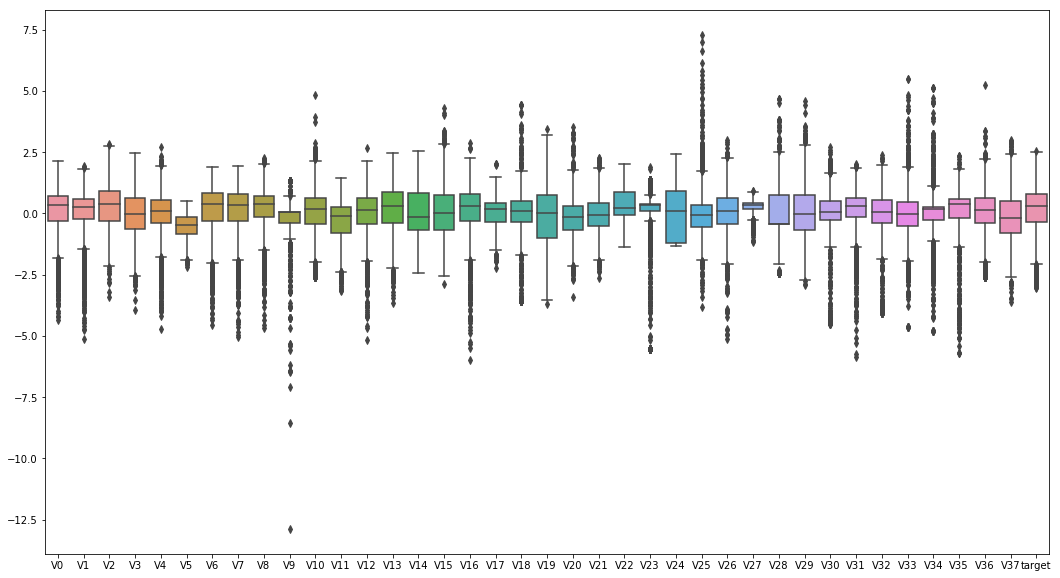

In [11]:
#我们发现有很多异常点
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18.0, 10.0))
sns.boxplot(data=train_df)

In [12]:
train_df.corrwith(train_df.target)

V0        0.873212
V1        0.871846
V2        0.638878
V3        0.512074
V4        0.603984
V5       -0.314676
V6        0.370037
V7        0.287815
V8        0.831904
V9        0.139704
V10       0.394767
V11      -0.263988
V12       0.594189
V13       0.203373
V14       0.008424
V15       0.154020
V16       0.536748
V17       0.104605
V18       0.170721
V19      -0.114976
V20       0.444965
V21      -0.010063
V22      -0.107813
V23       0.226331
V24      -0.264815
V25      -0.019373
V26      -0.046724
V27       0.812585
V28       0.100080
V29       0.123329
V30       0.187311
V31       0.750297
V32       0.066606
V33       0.077273
V34      -0.006034
V35       0.140294
V36       0.319309
V37      -0.565795
target    1.000000
dtype: float64

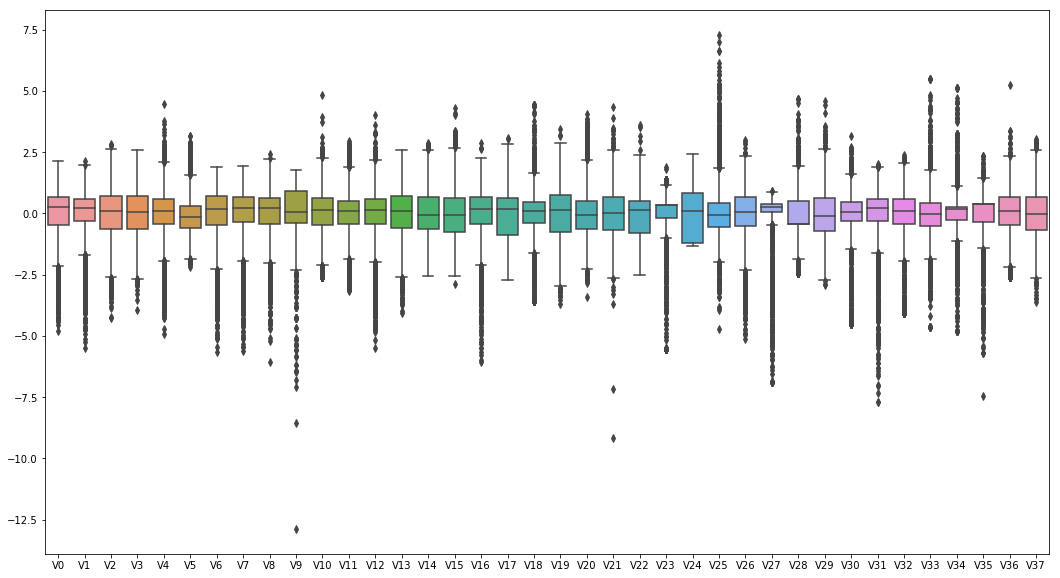

In [13]:
plt.figure(figsize=(18.0, 10.0))
sns.boxplot(data=x)

In [14]:
type(train_df.corrwith(train_df.target))

pandas.core.series.Series

In [15]:
ser=train_df.iloc[:,0:38].corrwith(train_df.target)
ser.index
dropCols=[]
for i in ser.index:
    print ser[i]
    if abs(ser[i])<0.40:
        dropCols.append(i)
print(dropCols)
x=x.drop(columns=dropCols)
x.head()

0.873212020498
0.871846411622
0.638877803645
0.512074466591
0.603984133716
-0.314675769663
0.370037173599
0.287815423197
0.831903988717
0.139704028428
0.394766884836
-0.263987827351
0.594188778163
0.203373210028
0.00842353485681
0.154020018523
0.536748081535
0.104604787221
0.170720590257
-0.114976467158
0.444965121603
-0.010063301717
-0.107812655878
0.226331280164
-0.264814967401
-0.0193726743503
-0.0467241512451
0.812584914527
0.100080249012
0.123329308128
0.187310848925
0.750296657317
0.0666057652757
0.0772729480971
-0.00603415502386
0.140294216606
0.319308865128
-0.565795240937
['V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V13', 'V14', 'V15', 'V17', 'V18', 'V19', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V28', 'V29', 'V30', 'V32', 'V33', 'V34', 'V35', 'V36']


,V0,V1,V2,V3,V4,V8,V12,V16,V20,V27,V31,V37
0,0.566,0.016,-0.143,0.407,0.452,-0.436,-0.073,-1.707,0.610,0.168,-0.615,-3.508
1,0.968,0.437,0.066,0.566,0.194,0.332,-0.134,-0.977,0.588,0.338,0.032,-0.730
2,1.013,0.568,0.235,0.370,0.112,0.396,-0.072,-0.618,0.576,0.326,0.277,-0.589
3,0.733,0.368,0.283,0.165,0.599,0.403,-0.014,-0.429,0.272,0.277,0.279,-0.112
4,0.684,0.638,0.260,0.209,0.337,0.314,0.199,-0.391,0.106,0.332,0.328,-0.028


[array([-0.468, -2.167]), array([ 0.666,  2.121]), array([-0.319, -1.69 ]), array([ 0.595,  1.96 ]), array([-0.625, -2.583]), array([ 0.698,  2.625]), array([-0.651, -2.681]), array([ 0.704,  2.603]), array([-0.428, -1.932]), array([ 0.576,  2.081]), array([-0.429, -2.023]), array([ 0.637,  2.235]), array([-0.434, -1.988]), array([ 0.604,  2.161]), array([-0.445, -2.092]), array([ 0.66 ,  2.278]), array([-0.639, -2.286]), array([ 0.496,  2.185]), array([ 0.056, -0.458]), array([ 0.399,  0.857]), array([-0.3  , -1.616]), array([ 0.578,  1.88 ]), array([-0.666, -2.631]), array([ 0.647,  2.598])]


[[-2.1669999999999998, 2.121],
 [-1.6899999999999999, 1.96],
 [-2.5830000000000002, 2.625],
 [-2.681, 2.6030000000000002],
 [-1.9319999999999999, 2.081],
 [-2.0230000000000001, 2.2349999999999999],
 [-1.9880000000000002, 2.161],
 [-2.0920000000000001, 2.278],
 [-2.286, 2.1850000000000001],
 [-0.45799999999999996, 0.85699999999999998],
 [-1.6159999999999999, 1.8799999999999999],
 [-2.6310000000000002, 2.5980000000000003]]

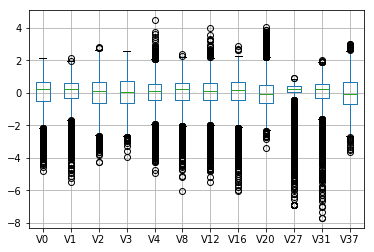

In [17]:
bp=x.boxplot(return_type='dict')
t=[whk.get_ydata() for whk in bp["whiskers"]]
print t
segs=[]
for i in range(len(t)/2):
    segs.append([t[i*2][1],t[i*2+1][1]])
segs

In [41]:
x.index[:2888]

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887],
           dtype='int64', length=2888)

In [42]:
x.index[2888:]

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924],
           dtype='int64', length=1925)

In [43]:
x.index=range(len(x))

In [44]:
x.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4803, 4804, 4805, 4806, 4807, 4808, 4809, 4810, 4811, 4812],
           dtype='int64', length=4813)

In [45]:
from functools import partial
def myFloor(t,segs,j):
    j=int(j)
#    print(t,j,segs[j][0],segs[j][1])
    if t<segs[j][0]:
        return segs[j][0]
    elif t>segs[j][1]:
        return segs[j][1]
    else:
        return t
print(x.head())
for j, col in enumerate(x.columns):
    print j,col
    for i in x.index:
        x.iloc[i,j]=myFloor(x.iloc[i,j],segs,j)

x.head()

      V0     V1     V2     V3     V4     V5     V6     V7     V8    V10  \
0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -0.940   
1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332  0.188   
2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396  0.874   
3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403  0.011   
4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -0.251   

   ...      V12    V13    V16    V20    V23    V24    V27    V31    V36    V37  
0  ...   -0.073  0.550 -1.707  0.610  0.356  0.800  0.168 -0.615 -2.608 -3.508  
1  ...   -0.134  1.109 -0.977  0.588  0.357  0.801  0.338  0.032 -0.335 -0.730  
2  ...   -0.072  0.767 -0.618  0.576  0.355  0.961  0.326  0.277  0.765 -0.589  
3  ...   -0.014  0.769 -0.429  0.272  0.352  1.435  0.277  0.279  0.333 -0.112  
4  ...    0.199 -0.349 -0.391  0.106  0.352  0.881  0.332  0.328 -0.280 -0.028  

[5 rows x 21 columns]
0 V0
1 V1
2 V2
3 V3
4 V4
5 V5
6 V6
7 V7


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V10,...,V12,V13,V16,V20,V23,V24,V27,V31,V36,V37
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-1.946,-0.436,-0.940,...,-0.073,0.550,-1.707,0.610,0.356,0.800,0.168,-0.615,-2.182,-2.631
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-1.946,0.332,0.188,...,-0.134,1.109,-0.977,0.588,0.357,0.801,0.338,0.032,-0.335,-0.730
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-1.946,0.396,0.874,...,-0.072,0.767,-0.618,0.576,0.355,0.961,0.326,0.277,0.765,-0.589
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-1.946,0.403,0.011,...,-0.014,0.769,-0.429,0.272,0.352,1.435,0.277,0.279,0.333,-0.112
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-1.946,0.314,-0.251,...,0.199,-0.349,-0.391,0.106,0.352,0.881,0.332,0.328,-0.280,-0.028


In [47]:
ntrain_x=x.iloc[:2888,:]
print(ntrain_x.shape)
ntrain_x.head()

(2888, 21)


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V10,...,V12,V13,V16,V20,V23,V24,V27,V31,V36,V37
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-1.946,-0.436,-0.940,...,-0.073,0.550,-1.707,0.610,0.356,0.800,0.168,-0.615,-2.182,-2.631
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-1.946,0.332,0.188,...,-0.134,1.109,-0.977,0.588,0.357,0.801,0.338,0.032,-0.335,-0.730
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-1.946,0.396,0.874,...,-0.072,0.767,-0.618,0.576,0.355,0.961,0.326,0.277,0.765,-0.589
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-1.946,0.403,0.011,...,-0.014,0.769,-0.429,0.272,0.352,1.435,0.277,0.279,0.333,-0.112
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-1.946,0.314,-0.251,...,0.199,-0.349,-0.391,0.106,0.352,0.881,0.332,0.328,-0.280,-0.028


In [48]:
ntest_x=x.iloc[2888:,:]
print(ntest_x.shape)
ntest_x.head()

(1925, 21)


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V10,...,V12,V13,V16,V20,V23,V24,V27,V31,V36,V37
2888,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,-0.419,...,0.346,-0.114,-0.089,-0.252,0.098,-1.314,0.208,-0.042,-0.567,0.388
2889,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,-0.403,...,0.465,0.653,-0.093,-0.276,0.090,-1.310,0.226,0.176,-0.294,0.104
2890,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.330,...,0.173,0.398,-0.061,-0.340,0.091,-1.310,0.084,0.199,0.373,0.569
2891,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,-0.431,...,-0.038,-0.340,-0.134,-0.292,0.086,0.234,0.203,0.137,-0.666,0.391
2892,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,-0.162,...,-0.063,0.611,-0.075,-0.150,0.089,0.237,0.227,0.370,-0.140,-0.497


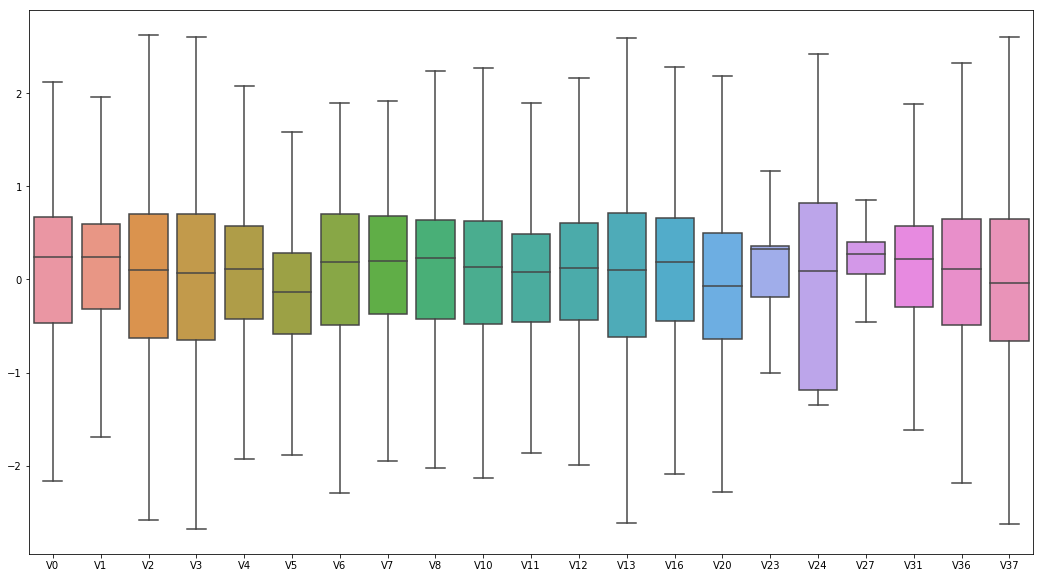

In [49]:
plt.figure(figsize=(18.0, 10.0))
sns.boxplot(data=x)

In [50]:
t=(x-x.mean())/(x.max()-x.min())
t

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V10,...,V12,V13,V16,V20,V23,V24,V27,V31,V36,V37
0,0.124413,-0.014469,-0.028685,0.076821,0.103312,-0.239067,-0.439729,-0.516337,-0.111402,-0.216891,...,-0.027050,0.104512,-0.399786,0.141374,0.108604,0.212441,-0.021996,-0.196814,-0.486876,-0.503278
1,0.218163,0.100874,0.011445,0.106912,0.039021,-0.236758,-0.380976,-0.516337,0.068964,0.039298,...,-0.041753,0.211950,-0.232738,0.136453,0.109064,0.212706,0.107281,-0.011745,-0.077250,-0.139728
2,0.228657,0.136764,0.043895,0.069818,0.018588,-0.209053,-0.333448,-0.516337,0.083995,0.195101,...,-0.026809,0.146219,-0.150587,0.133769,0.108144,0.255180,0.098156,0.058335,0.166706,-0.112763
3,0.163359,0.081970,0.053112,0.031022,0.139943,-0.174998,-0.293562,-0.516337,0.085639,-0.000902,...,-0.012830,0.146604,-0.107337,0.065776,0.106763,0.381010,0.060893,0.058907,0.070898,-0.021541
4,0.151931,0.155942,0.048695,0.039349,0.074656,-0.110063,-0.263230,-0.516337,0.064737,-0.060407,...,0.038507,-0.068272,-0.098642,0.028647,0.106763,0.233943,0.102718,0.072923,-0.065053,-0.005477
5,0.096195,0.152929,0.077113,0.041431,0.104808,-0.283800,-0.247945,-0.503398,0.103957,-0.119457,...,0.061405,0.174088,-0.085370,0.011425,0.105383,0.211910,0.120969,0.081504,-0.045314,-0.168988
6,0.199739,0.095120,0.121660,0.067169,0.046497,-0.236758,-0.200895,-0.484505,0.162200,-0.061542,...,0.092978,0.120273,-0.085370,0.039831,0.106763,0.212706,0.155190,0.048609,-0.037330,-0.252178
7,0.221894,0.126079,0.133949,0.082688,0.054970,-0.243685,-0.169846,-0.458108,0.167837,-0.018617,...,0.056102,0.148718,0.005706,0.061750,0.113206,0.211910,0.161274,0.101527,0.019223,-0.172048
8,0.213499,0.214025,0.110907,0.086662,0.137950,-0.129976,-0.148112,-0.407124,0.170185,0.043159,...,0.083820,-0.056548,0.028818,0.060855,0.113206,0.211910,0.222871,0.149868,0.008800,-0.105878
9,0.262239,0.270189,0.121276,0.116563,0.360227,-0.190005,-0.153128,-0.407124,0.218330,0.029532,...,0.156367,-0.028103,0.035454,0.063763,0.109525,-0.162393,0.239601,0.241115,0.030534,-0.221388


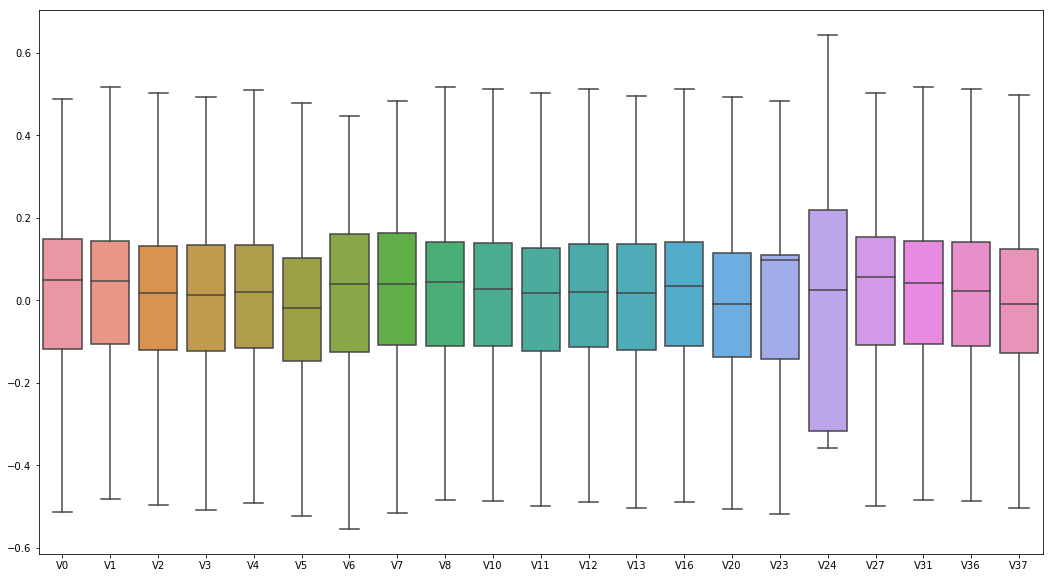

In [51]:
plt.figure(figsize=(18.0, 10.0))
sns.boxplot(data=t)